This is an example Jupyter Notebook for those who attended the "Publishing your data analysis story with Jupyter Notebook" taught by the Bioinformatics Education and Training Program (BTEP) at NIH.

#### Helpful Jupyter Notebook resources
[Here is a list of common Jupyter Notebook shortcuts](https://gist.github.com/discdiver/9e00618756d120a8c9fa344ac1c375ac)

#### Formatting markdown

*italics*

**bold**

***bold and italic***

### header type

<p><i>italics in html, markdown can accept html</i></p>
<p><b>bold in html</b></p>

$$ E=\ {MC^2} \ equation\ 1 $$

### we can create ordered lists
Jupyter Notebook

    1. allows for documentation of analyses
    2. sharing of analyses
    3. facilitates reproducible analysis

### we can create unordered lists
Jupyter Notebook

    * allows for documentation of analyses
    * sharing of analyses
    * facilitates reproducible analysis


#### Coding in Jupytr Notebook

Notes on Python codes

    * Import is used to load Python packages
    * We can include "import as" to shorten the package name.
    * Use the os package for working with directory (i.e. os.chdir('directory_path') sets the working directory)
    * [Pandas](https://pandas.pydata.org/) is great for working with data frames
    * [Matplotlib](https://matplotlib.org/) has lots of plotting features
    * [Numpy](https://numpy.org/) offers a wide set of mathematic functions, here we use it to generate arrays
    * [Ipywidget](https://ipywidgets.readthedocs.io/en/latest/) allows us to create interactive wigets that could be deployed to the web for sharing with others
    * Include %%capture in a code block to suppress output

In [1]:
#import os
#os.chdir('/Users/wuz8/Documents/introduction_jupyter_notebook_2021129')

#### Using Pandas to import csv files into Python workspace as a dataframe and then view the dataframe.

In [2]:
%%capture 
import pandas as pd
## read Maryland covid cases reported for each county from 10/30/2021 to 11/3/2021 and store
## as dataframe cov_md
cov_md=pd.read_csv("time_series_covid19_confirmed_maryland_1_sort1.csv")
cov_md.head()

In [3]:
%%capture
## rename the case report date columns in cov_md
cov_md.rename({'X10.30.21':'oct-30-2021'},inplace=True,axis='columns')
cov_md.rename({'X10.31.21':'oct-31-2021'},inplace=True,axis='columns')
cov_md.rename({'X11.1.21':'nov-1-2021'},inplace=True,axis='columns')
cov_md.rename({'X11.2.21':'nov-2-2021'},inplace=True,axis='columns')
cov_md.rename({'X11.3.21':'nov-3-2021'},inplace=True,axis='columns')
## print the first 5 rows of cov_md
cov_md.head()

#### Use Python widgets to create an interactive drop down menu and radio buttons that allow us to view covid cases reported for a particular Maryland county on a particular date. There are extensions such as [Voila](https://voila.readthedocs.io/en/stable/using.html) that allows us to turn these interactive widgets into web apps to share with othrs.

In [4]:
import ipywidgets as widgets

In [5]:
maryland_county=widgets.Dropdown(
    options=cov_md.County,
    value=cov_md.County[0],
    description='Maryland county',
    disabled=False)
display(maryland_county)


Dropdown(description='Maryland county', options=("Prince George's", 'Montgomery', 'Baltimore', 'Baltimore City…

In [6]:
maryland_cov_report_date=widgets.RadioButtons(
    options=["oct-30-2021", "oct-31-2021", "nov-1-2021", "nov-2-2021", "nov-3-2021"],
    description='Maryland case report date',
    disabled=False)
display(maryland_cov_report_date)

RadioButtons(description='Maryland case report date', options=('oct-30-2021', 'oct-31-2021', 'nov-1-2021', 'no…

In [7]:
report_output = widgets.Output()
display(report_output)

Output()

In [8]:
%%capture
from ipywidgets import interactive
def filter_function(county,cov_md_report_date):
    filtered=cov_md.loc[cov_md['County'] == county].loc[:,cov_md_report_date]  
    with report_output:        
        report_output.clear_output()
        cov_cases=('there were '+filtered.to_string(index=False)+' covid cases reported in '+county+' on '+cov_md_report_date)      
        display(cov_cases)
         
interactive(filter_function, county=maryland_county, cov_md_report_date=maryland_cov_report_date)

In [9]:
%%capture
## use .loc to extract elements in a Pandas dataframe
## here we want cases reported for Baltimore county on November 3, 2021
cov_md.loc[cov_md['County']=="Baltimore",'nov-3-2021']

#### Generating arrays and creating scatter plot and bar plot in Python

In [88]:
import numpy as np
import matplotlib.pyplot as plt
## use numpy to generate arrays
a1=np.array([0,1,2,3,4,5])
a2=np.array([0,3,6,9,12,15])
a3=np.array([150,200,75,80,195])
a4=np.array([10,15,5,8,9])
a5=np.array(["a","b","c","d","e"])
## arrays containing errors used for error bars
error_1=np.array(a3-a4)
error_2=np.array(a3+a4)
error_3=[a4,a4]

Text(0.5, 1.0, 'BCA assay standard curve')

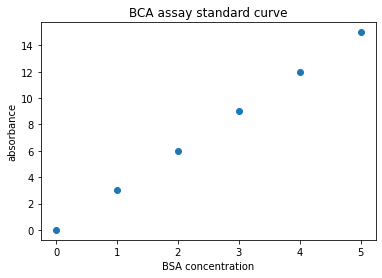

In [91]:
plt.scatter(a1,a2)
plt.ylabel("absorbance")
plt.xlabel("BSA concentration")
plt.title("BCA assay standard curve")

Text(0.5, 1.0, 'gene counts')

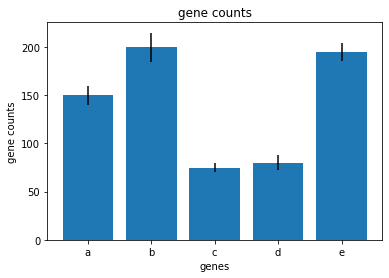

In [13]:
plt.bar(a5,a3, yerr=error_3)
plt.ylabel('gene counts')
plt.xlabel('genes')
plt.title('gene counts')

#### The [rpy2 extension] allows us to run R code in a Python Jupyter Notebook

In [2]:
%load_ext rpy2.ipython

#### Making a bar plot in R

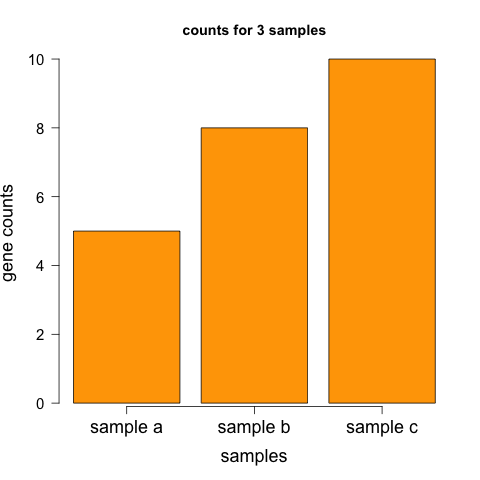

In [103]:
%%R
samples <- c("sample a", "sample b", "sample c")
counts <- c(5,8,10)
gene_counts <- data.frame(samples,counts)
gene_counts
## in barplot, the first argument is the data that we want plotted
## in this example, we want to plot the counts column in gene_counts specified by gene_counts$counts
barplot(gene_counts$counts, xlab="samples", ylab="gene counts", main="counts for 3 samples",
names=gene_counts$samples, axis.lty=1, las=1, cex.axis=1.25, cex.lab=1.5, cex.name=1.5, col="orange")

![R barplot parameters explained](r_bar_plot_parameter_1.png)

#### Making bar plots with error bars in R (using ggplot2)


In [3]:
%%R
b1 <- c(0,1,2,3,4,5)
b2 <- c(0,3,6,9,12,15)
b3 <- c(150,200,75,80,195)
b4 <- c(10,15,5,8,9)
b5 <- c("a","b","c","d","e")
b6 <- data.frame(b5,b3,b4)
b6

  b5  b3 b4
1  a 150 10
2  b 200 15
3  c  75  5
4  d  80  8
5  e 195  9


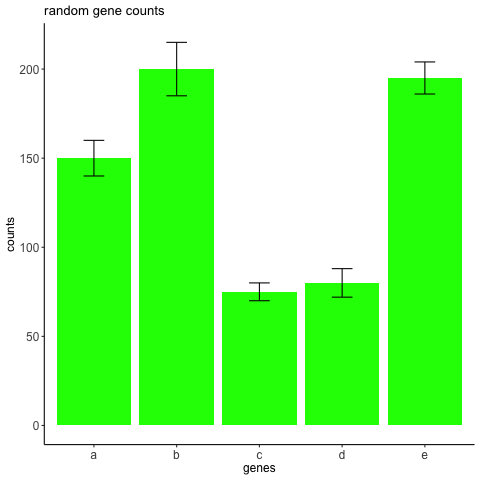

In [7]:
%%R
library(ggplot2)
## set plot variable to b7
## declare b6 as the data that we want to plot in the first argument in ggplot
## in the second argument in ggplot, aes, we declare the y and x variables
b7 <- ggplot(b6,aes(y=b3,x=b5))
## use geom_bar to indicate we want a bar plot, the parameter fill sets the colors for the bars
b7 <- b7+geom_bar(stat="identity", fill="green")
## geom_errorbar will allow us to set the error bars
## inside aes, ymin declares the lower bounds of the error bars (vector b3 - b4)
## inside aes, ymax declares the upper bounds of the error bars (vector b3 + b4)
## inside aes, width declares the error bar width
b7 <- b7+geom_errorbar(aes(x=b5,ymin=b3-b4,ymax=b3+b4),width=0.25)
## xlab declares the x axis label
## ylab declares the y axis label
b7 <- b7+xlab("genes")+ylab("counts")
## in theme:
## panel.background sets the plot background - here we set it white
## we use panel.grid.major and panel.grid.minor to turn off the grids in the plot
## axis.line.y and axis.line.x allows us to set the y and x axis lines (setting to black here)
## axis.text.x and axis.text.y sets the font size for the x and y axis tick labels
## axis.title.x and axis.title.y sets the font size for the x and y axis titles
b7 <- b7+theme(panel.background=element_rect(fill="white"), panel.grid.major=element_blank(), panel.grid.minor=element_blank(), axis.line.y=element_line(color="black"), axis.line.x=element_line(color="black"), axis.text.x=element_text(size=12), axis.text.y=element_text(size=12), axis.title.x=element_text(size=12), axis.title.y=element_text(size=12))
b7 <- b7+labs(title="random gene counts")
plot(b7)

#### Constructing principle components analysis (PCA) in R using a made RNA seq count dataset and plotting using [ggbiplot](https://www.google.com/search?q=ggbiplot&rlz=1C5GCEM_enUS966US966&oq=ggbiplot&aqs=chrome..69i57j0i512l8j0i10i512.2190j0j7&sourceid=chrome&ie=UTF-8)

In [9]:
%%R
setwd('/Users/wuz8/Documents/introduction_jupyter_notebook_2021129')

In [10]:
%%R
library(ggbiplot)
sample_rna_seq_1 <- read.csv('sample_rna_seq.csv', header=TRUE, row.names=1)
sample_rna_seq_1 <- data.frame(t(sample_rna_seq_1)) ## use t() to transpose a dataframe - columns to rows and rows to columns
sample_rna_seq_1_pca <- prcomp(sample_rna_seq_1, center=TRUE, scale.=TRUE)
ggbiplot(sample_rna_seq_1_pca,loading=TRUE,labels=rownames(sample_rna_seq_1))+ylim(c(-1.5,1.5))+xlim(c(-1.5,1.5))

R[write to console]: Error in rownames(sample_rna_seq) : object 'sample_rna_seq' not found




Error in rownames(sample_rna_seq) : object 'sample_rna_seq' not found


RInterpreterError: Failed to parse and evaluate line "library(ggbiplot)\nsample_rna_seq_1 <- read.csv('sample_rna_seq.csv', header=TRUE, row.names=1)\nsample_rna_seq_1 <- data.frame(t(sample_rna_seq_1)) ## use t() to transpose a dataframe - columns to rows and rows to columns\nsample_rna_seq_1_pca <- prcomp(sample_rna_seq_1, center=TRUE, scale.=TRUE)\nggbiplot(sample_rna_seq_1_pca,loading=TRUE,labels=rownames(sample_rna_seq))+ylim(c(-1.5,1.5))+xlim(c(-1.5,1.5))\n".
R error message: "Error in rownames(sample_rna_seq) : object 'sample_rna_seq' not found"

The above PCA plot shows that sample 1 and sample 3 are separated from sample 2 and sample 4 on principle component axis 1 (PC1, which explains 50.3% of the variation within the data).
On the other hand, it appears that sample 3 are different from sample 1, sample 2, and sample 4 based on their separation on principle component axis 2 (PC2, which explains 29.3% of the variation in the data).

The red errors in the PCA plot are loadings and it looks liks ADSL is responsible for separating the samples along PC1.

#### Creating a volcano plot using sample RNA seq data obtained from NCBI GEO study
[gse48812](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=gse48812).
The dataset used here compared changes to the transcriptome between lncap versus pc3 prostate cancer cells treated with sulforaphane for 6 hours.

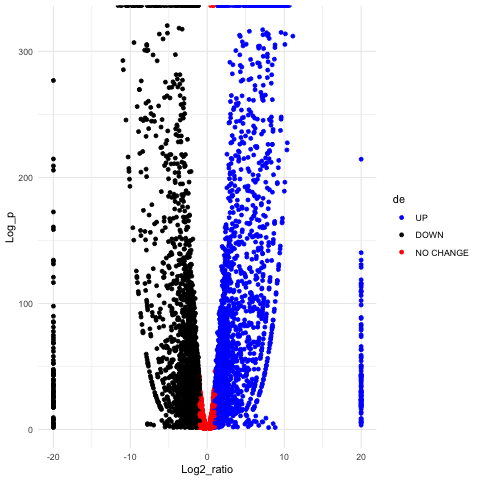

In [86]:
%%R
sample_rna_seq_2 <- read.delim("gse48812_6h_lncap_vs_pc3.txt")
sample_rna_seq_2$Log_p <- -1*log10(sample_rna_seq_2$P_value)
sample_rna_seq_2$de <- "NO CHANGE"
sample_rna_seq_2$de[sample_rna_seq_2$Log2_ratio >=1 & sample_rna_seq_2$P_value < 0.05] <- "UP"
sample_rna_seq_2$de[sample_rna_seq_2$Log2_ratio <=-1 & sample_rna_seq_2$P_value < 0.05] <- "DOWN"
de_genes <- c("blue", "black", "red")
names(de_genes) <- c("UP", "DOWN", "NO CHANGE")
sample_rna_seq_2_plot <- ggplot(sample_rna_seq_2, aes(x=Log2_ratio, y=Log_p, col=de))+geom_point()
sample_rna_seq_2_plot <- sample_rna_seq_2_plot + scale_color_manual(values=de_genes)+theme_minimal()
plot(sample_rna_seq_2_plot)